# Tunisia Real Estate Analysis

## Importing Libraries:

In [2]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 4.3.3"


## Data exploration:

### loading the dataset

In [3]:
data <- read.csv("dataset/tunisia-real-estate.csv",
stringsAsFactors = TRUE,
header = TRUE, dec = ".",
sep = ",")

### Viewing the structure of the dataset:

In [26]:
# View the Column Names
names(data)
# View the first few rows of the dataset
head(data)

# View the data Size
dim(data)

# View the structure of the dataset
str(data)

[1] "Governorate"         "Delegation"          "Locality"           
[4] "Nature"              "Type.of.Real.Estate" "Surface"            
[7] "Price"               "Inserted.On"

,Governorate,Delegation,Locality,Nature,Type.of.Real.Estate,Surface,Price,Inserted.On
,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dttm>
1,Tunis,Sidi El Bechir,Sidi El Bechir,Sale,2-room apartment,70,120000,NA
2,Sousse,Akouda,Akouda,Sale,2-room apartment,74,230000,NA
3,Tunis,La Marsa,La Marsa,Rental,Houses,400,6500,NA
4,Tunis,Carthage,Carthage,Rental,Surfaces,180,1400,NA
5,Sousse,Hammam Sousse,Hammam Sousse,Sale,3-room apartment,145,160000,NA
6,Tunis,La Marsa,La Marsa,Rental,2-room apartment,120,1500,NA


[1] 25317     8

'data.frame':	25317 obs. of  8 variables:
 $ Governorate        : Factor w/ 24 levels "Ariana","Beja",..: 23 20 23 23 20 23 23 1 23 23 ...
 $ Delegation         : Factor w/ 193 levels "Agareb","Ain Draham",..: 169 4 112 26 79 112 48 5 3 115 ...
 $ Locality           : Factor w/ 193 levels "Agareb","Ain Draham",..: 169 4 112 26 79 112 48 5 3 115 ...
 $ Nature             : Factor w/ 7 levels "Land","Offices & Shops",..: 5 5 4 4 5 4 4 5 7 4 ...
 $ Type.of.Real.Estate: Factor w/ 15 levels "1-room apartment",..: 2 2 10 13 3 2 12 8 2 12 ...
 $ Surface            : num  70 74 400 180 145 ...
 $ Price              : num  120000 230000 6500 1400 160000 1500 300 570000 150 650 ...
 $ Inserted.On        : POSIXct, format: NA NA ...


## Data cleaning:

### Checking for missing values:

In [5]:
# Check for missing values in the entire dataset
any(is.na(data))

# Check for missing values in specific columns
colSums(is.na(data))

[1] FALSE

Governorate          Delegation            Locality              Nature 
                  0                   0                   0                   0 
Type.of.Real.Estate             Surface               Price         Inserted.On 
                  0                   0                   0                   0

- there is no missing values in the dataset.

### Checking for duplicates:

In [6]:
# Check for duplicated rows
duplicated_rows <- data[duplicated(data), ]

### Rmeoving duplicates:

In [7]:
# Remove duplicated rows
data <- unique(data)

### Converting data types:

In [8]:
# Convert columns to appropriate data types
data$Price <- as.numeric(data$Price)
# Convert Date/Time columns
data$Inserted.On <- as.POSIXct(data$Inserted.On, format = "%Y-%m-%d %H:%M:%S")

## Descriptive Analysis:

### Summary Statistics for Price Variable:

In [9]:
# Summary statistics for price
summary(data$Price)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
       2     1500   100000   422246   428000 16000000 

### Summary Statistics for Surface Variable:

In [10]:

summary(data$Surface)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
       0       90      179     9902      460 32000000 

### Frequency Table for Categorical Variables (Governorate, Delegation, Locality):

In [27]:
# Frequency table for Governorate
table_governorate <- table(data$Governorate)
print(table_governorate)

# Frequency table for Nature
table_nature <- table(data$Nature)
print(table_nature)

# Frequency table for Locality
table_type_of_real_estate <- table(data$Type.of.Real.Estate)
print(table_type_of_real_estate)


     Ariana        Beja   Ben arous     Bizerte       Gabes       Gafsa 
       4605          86        2458         500          54          34 
   Jendouba    Kairouan   Kasserine      Kebili      Le Kef      Mahdia 
         35          18          13           3          69          95 
    Manouba    Medenine    Monastir      Nabeul        Sfax Sidi bouzid 
        512         153         167        5878         452          22 
    Siliana      Sousse   Tataouine      Tozeur       Tunis    Zaghouan 
         25        1378           6           9        8561         184 



           Land Offices & Shops        Purchase          Rental            Sale 
           4779            1860               2            9338            8966 
        Sharing Vacation rental 
             16             356 

         1-room apartment          2-room apartment          3-room apartment 
                     1716                      2941                      3595 
         4-room apartment 5-room apartment and more         Agricultural land 
                     1909                       489                      1363 
        Business property                    Duplex           Free management 
                      286                       579                        93 
                   Houses                    Office                     Other 
                     5495                       990                       933 
                 Surfaces               Vacant land          Workshop, Garage 
                     1396                      3416        

## Data Visualization:

### Pie Plot for Governorate Variable

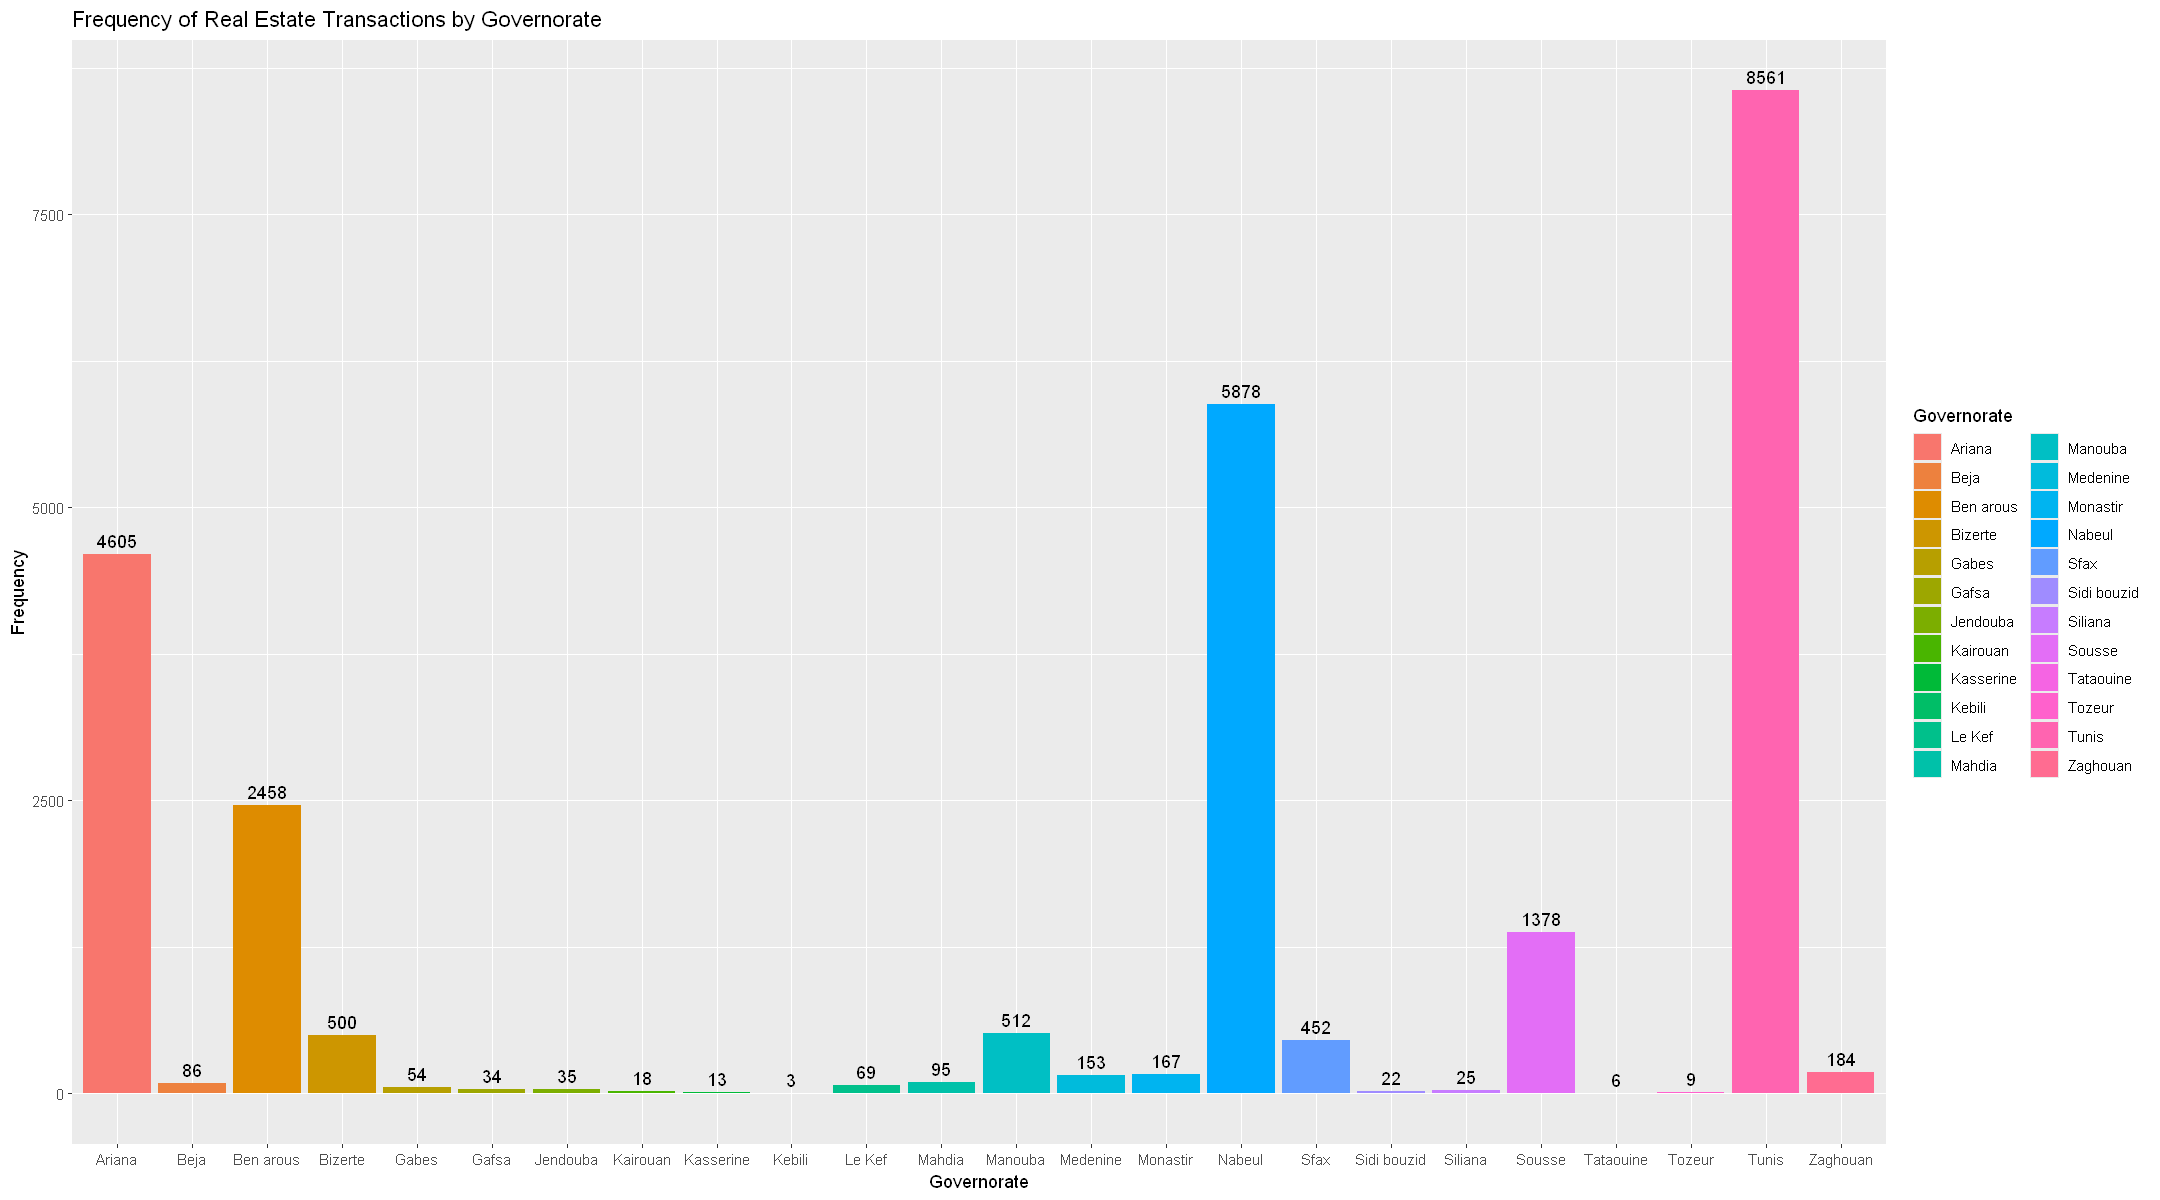

In [16]:
# Set the default size of plots
options(repr.plot.width=18, repr.plot.height=10)

# Bar plot for Governorate
plot_governorate <- ggplot(data, aes(x = Governorate, y = after_stat(count), fill = Governorate)) +
  geom_bar(stat = "count", width = 0.9) +
  geom_text(stat = 'count', aes(label = ..count..), vjust = -0.5) +
  theme(axis.text.x = element_text(hjust = 0.5)) +
  ggtitle("Frequency of Real Estate Transactions by Governorate") +
  xlab("Governorate") +
  ylab("Frequency")

plot_governorate

# Save the pie chart for Governorate as an image
ggsave("plots/Frequency of Real Estate Transactions by Governorate.png", plot_governorate, width = 18, height = 10)

- from this plot, we can conclude that the most real estate transactions are done within these four governorates:
    - Tunis by 8561
    - Nabeul by 5876
    - Ariana by 4605
    - Ben Arous by 2458
> from now on, we will focus our analysis on **these four governorates**.

### Box Plot for Numerical Variable (Price) by Governorate:

Warning message:
"Removed 818 rows containing non-finite outside the scale range
(`stat_boxplot()`)."
Warning message:
"Removed 818 rows containing non-finite outside the scale range
(`stat_boxplot()`)."


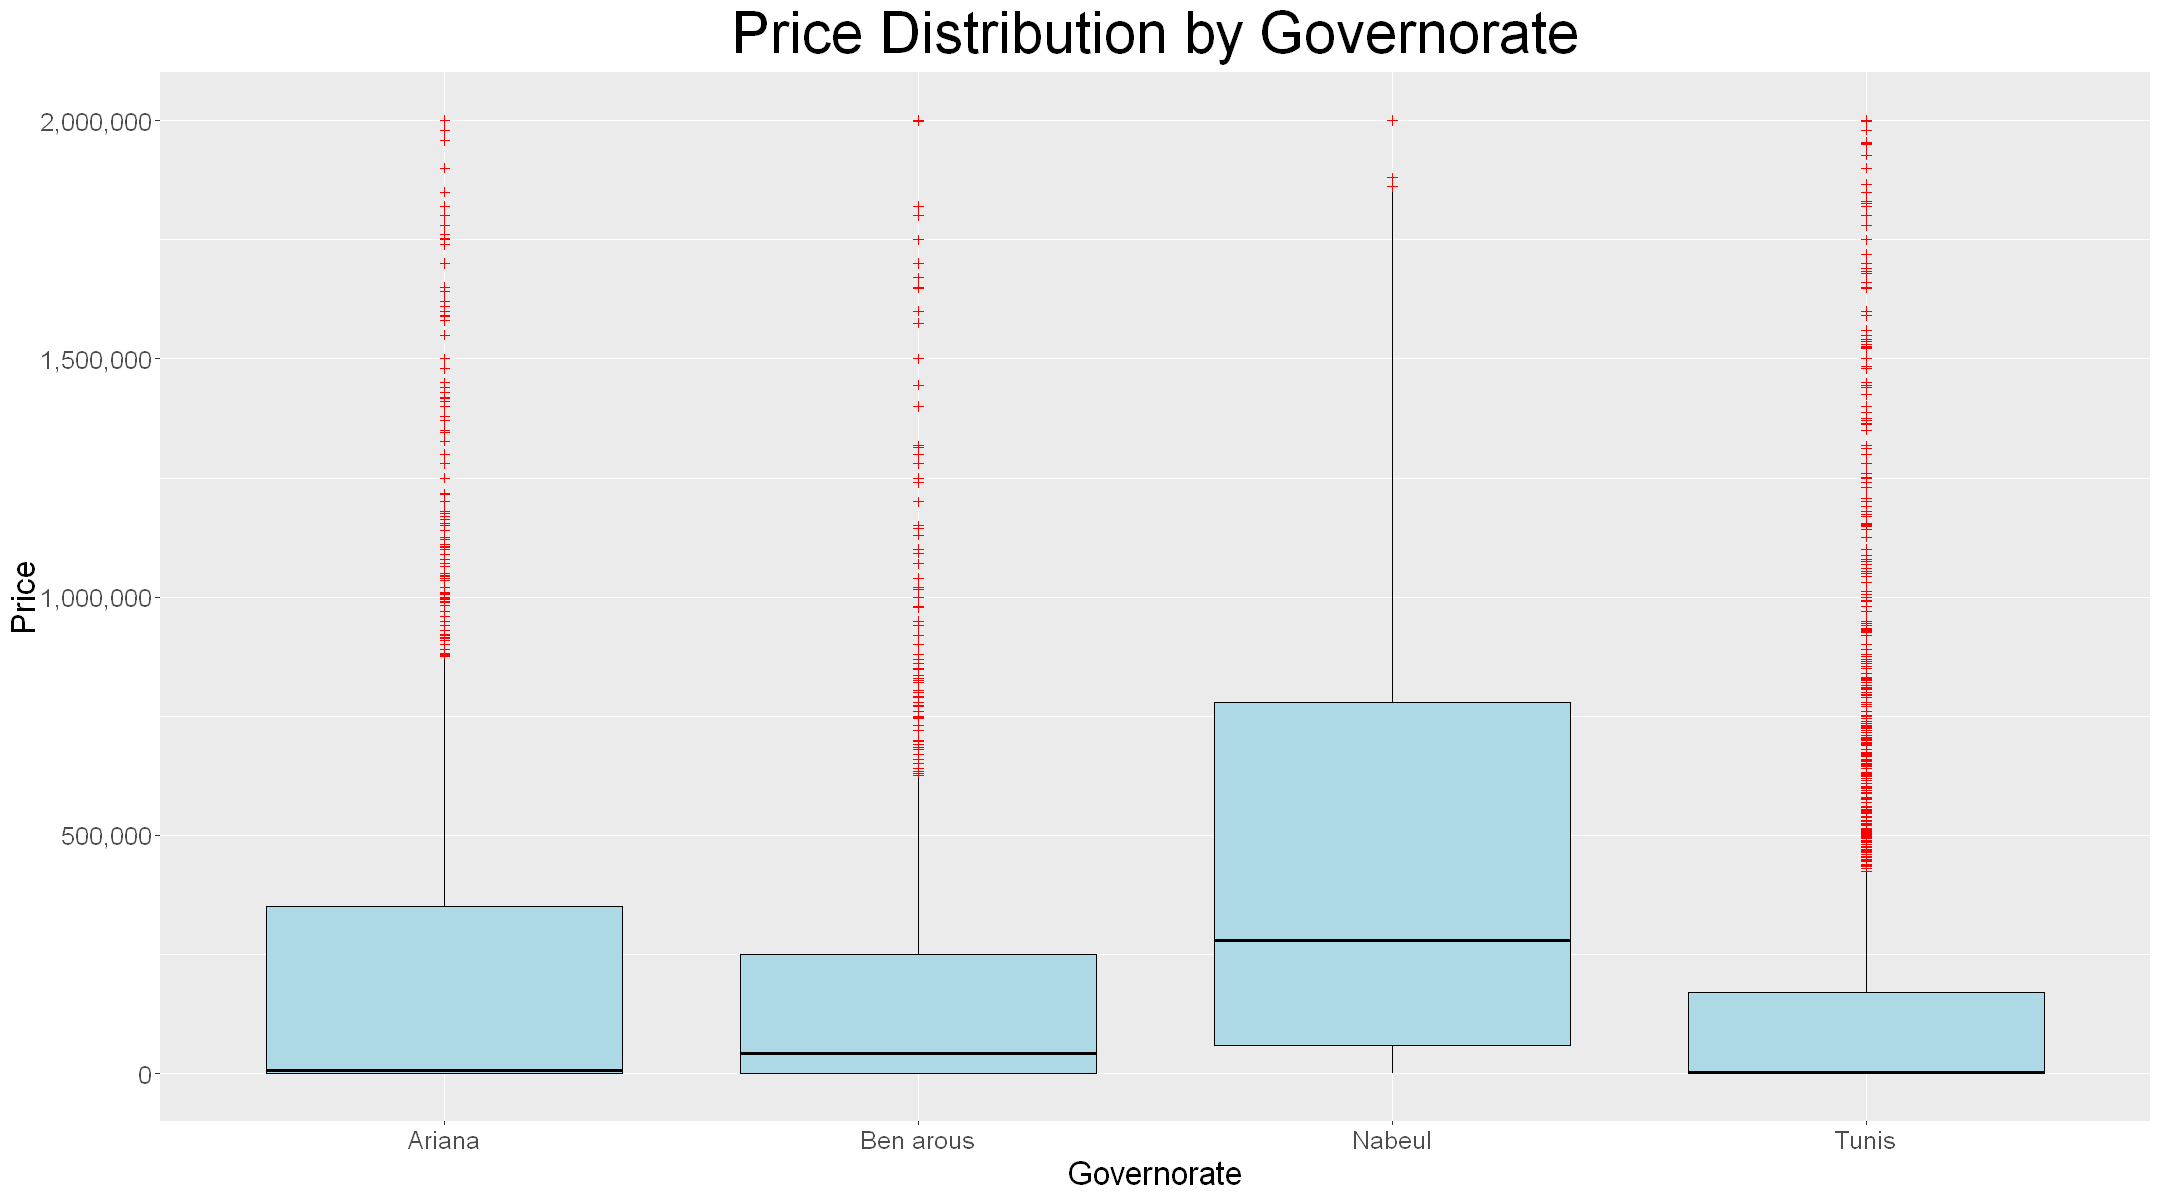

In [34]:
# making a subset for the mentioned governorates only
sub_set = subset(data, Governorate %in% c("Tunis", "Ben arous", "Nabeul", "Ariana"))

plot_price <- ggplot(sub_set, aes(x = Governorate, y = Price)) +
  geom_boxplot(outlier.shape = 3,  # Use a different shape for outliers
               outlier.color = "red",  # Use a different color for outliers
               fill = "lightblue",  # Use a different fill color for the boxes
               color = "black")+  # Use a different color for the box outlines
  ggtitle("Price Distribution by Governorate") +
  xlab("Governorate") +
  ylab("Price") +
  scale_y_continuous(labels = scales::comma, limits = c(0, 2000000)) +
  theme(axis.text = element_text(size = 15),
        axis.title = element_text(size = 20),
        plot.title = element_text(size = 35,hjust = 0.5))

plot_price

# Save the box plot with custom dimensions
ggsave("plots/box_plot_price_governorate.png",
plot_price,width = 18, height = 10)


> Insights:
- from this plot we can conclude some few things:
    - **Ariana and Ben Arous** : Both have similar price distributions with some outliers, indicating a stable property market.
    - **Nabeul** : Exhibits a higher median price with outliers, suggesting a more expensive property market with some very high-priced properties.
    - **Tunis** : Has a lower median price but many high-priced outliers, indicating a wide range of property prices.

### Filtering data only for the specified governorates:

In [14]:
# Filter data for only the specified Governorates
data_tunis <- subset(data, Governorate == "Tunis")
data_ariana <- subset(data, Governorate == "Ariana")
data_ben_arous <- subset(data, Governorate == "Ben arous")
data_Nabeul <- subset(data, Governorate == "Nabeul")

> now we will start analysing each governorate seperatly

### The Governorate of Tunis: